# Kidney Disease Prediction

---


## Step1 : Introduction

Chronic kidney disease (CKD) is a prevalent and serious health condition affecting millions worldwide. Early detection and management are crucial for improving patient outcomes and reducing the risk of complications. In this notebook, we'll focus on predicting kidney disease using machine learning techniques based on clinical and laboratory measurements.

Our dataset comprises various features that are commonly used in diagnosing and monitoring kidney function. These include blood pressure (Bp), specific gravity (Sg), albumin (Al), sugar (Su), presence of red blood cells (Rbc) in urine, blood urea nitrogen (Bu), serum creatinine (Sc), sodium (Sod), potassium (Pot), hemoglobin (Hemo), white blood cell count (Wbcc), red blood cell count (Rbcc), presence of hypertension (Htn), and the target variable, classifying individuals as either having kidney disease or not (Class).

Throughout this notebook, we'll adopt a structured approach encompassing data preprocessing, model selection, training, evaluation, and, if applicable, deployment. Our aim is to develop accurate predictive models that can assist healthcare professionals in identifying individuals at risk of kidney disease early on.

By leveraging machine learning algorithms on this dataset, we strive to contribute to the advancement of diagnostic tools for kidney disease, ultimately improving patient care and outcomes.


## Step2 : Load Date


In [1]:
%pip install seaborn
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/mohamedmosilhy/data_set/main/chronic_kidney_disease_dataset.csv")

In [3]:
df.head(10)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
5,90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.00,3.20,12.2,7800.0,4.40,1.0,1
6,70.0,1.010,0.0,0.0,1.0,54.0,24.0,104.00,4.00,12.4,8406.0,4.71,0.0,1
7,76.0,1.015,2.0,4.0,1.0,31.0,1.1,137.53,4.63,12.4,6900.0,5.00,0.0,1
8,100.0,1.015,3.0,0.0,1.0,60.0,1.9,137.53,4.63,10.8,9600.0,4.00,1.0,1
9,90.0,1.020,2.0,0.0,0.0,107.0,7.2,114.00,3.70,9.5,12100.0,3.70,1.0,1


### columns description

- Bp - Blood Pressure
- Sg - Specific Gravity
- Al - Albumin
- Su - Sugar
- Rbc - Red Blood Cell
- Bu - Blood Urea
- Sc - Serum Creatinine
- Sod - Sodium
- Pot - Pottasium
- Hemo - Hemoglobin
- Wbcc - White Blood Cell Count
- Rbcc - Red Blood Cell Count
- Htn - Hypertension
- Class - Predicted Class


In [4]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [5]:
print(df.shape)

(400, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [7]:
df.nunique()

Bp        11
Sg         5
Al         6
Su         6
Rbc        2
Bu       118
Sc        85
Sod       35
Pot       41
Hemo     116
Wbcc      90
Rbcc      46
Htn        3
Class      2
dtype: int64

## Step3: Data Cleaning and Preprocessing


In [8]:
# null values count
print(df.isnull().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


In [9]:
# check Duplicate values
df.duplicated().sum()

0

In [10]:
# verify data consistency
categorical_variables = ['Sg', 'Al', 'Su', 'Rbc', 'Htn', 'Class']
for col in categorical_variables:
    print(f"Unique values in {col}: {df[col].unique()}")

print(df['Htn'].value_counts())

# Since Htn column has 3 values 0, 1, and 0.37.It seems there might be some inconsistency in the 'Htn' (Hypertension) variable, as it contains the value '0.37'

rows_with_unexpected_value = df[df['Htn'] == 0.37]
print(rows_with_unexpected_value)


df = df[df['Htn'] != 0.37]

Unique values in Sg: [1.02  1.01  1.005 1.015 1.025]
Unique values in Al: [1. 4. 2. 3. 0. 5.]
Unique values in Su: [0. 3. 4. 1. 2. 5.]
Unique values in Rbc: [1. 0.]
Unique values in Htn: [1.   0.   0.37]
Unique values in Class: [1 0]
Htn
0.00    251
1.00    147
0.37      2
Name: count, dtype: int64
       Bp     Sg   Al   Su  Rbc    Bu   Sc    Sod  Pot  Hemo     Wbcc  Rbcc  \
288  70.0  1.025  0.0  0.0  1.0  46.0  1.2  135.0  4.9  15.9  11000.0   5.1   
297  60.0  1.025  0.0  0.0  1.0  26.0  1.0  146.0  4.9  15.8   7700.0   5.2   

      Htn  Class  
288  0.37      0  
297  0.37      0  


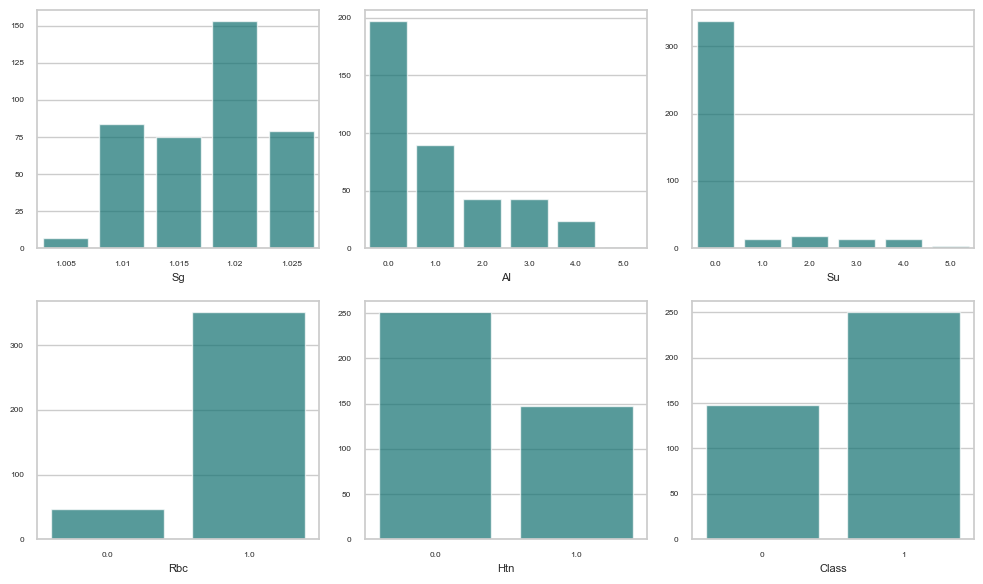

In [11]:
categorical_columns = ['Sg', 'Al', 'Su', 'Rbc', 'Htn', 'Class']

sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 6))
for i, cat_var in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=cat_var, color='Teal', alpha=0.7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(cat_var, fontsize=8)
    plt.ylabel('')

plt.tight_layout()
plt.show()

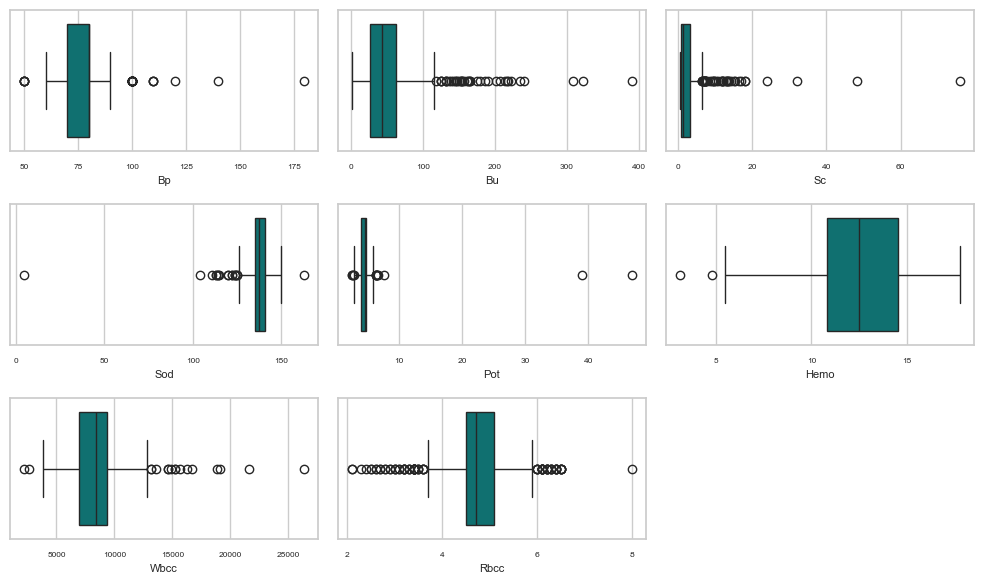

In [12]:
# Box-Plot Representation
numerical_columns = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']


sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=var, color='Teal')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [13]:
# # Drop outliers for each feature
# df = df[~outliers.any(axis=1)]

# # Print the shape of the cleaned DataFrame
# print("Shape  DataFrame after dropping outliers:", df.shape)


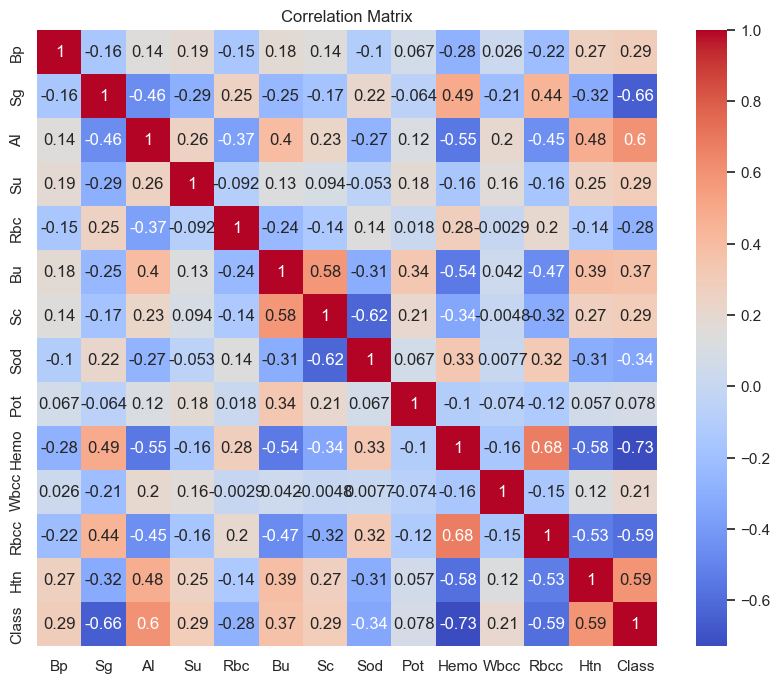

In [14]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

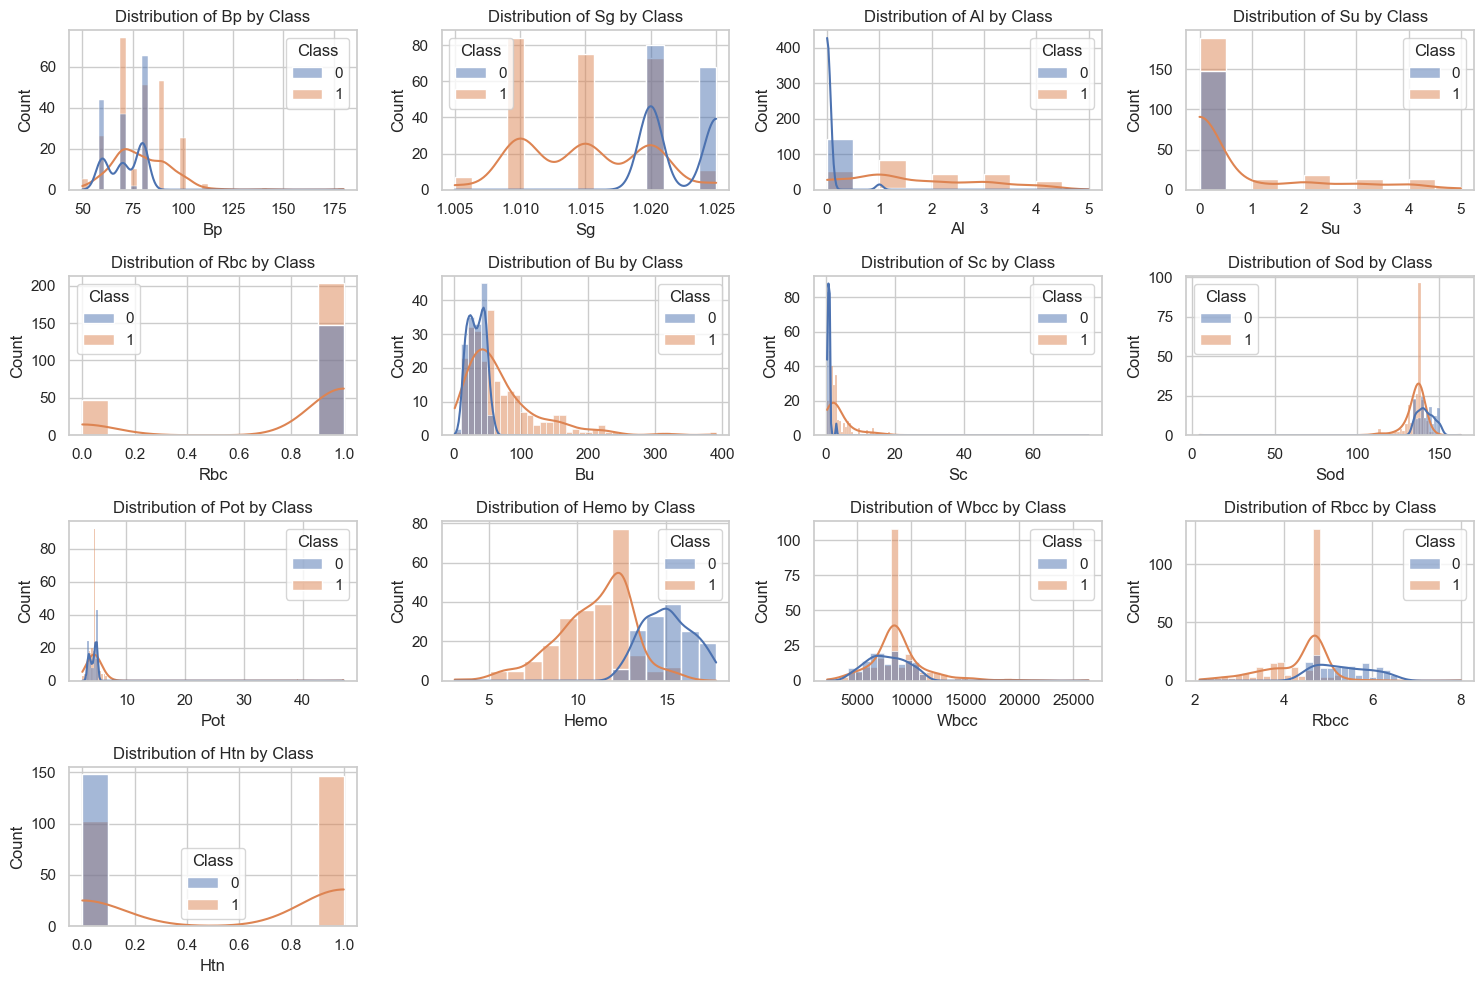

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = len(df.columns) - 1
n_rows = (n_cols - 1) // 4 + 1

fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(15, 10))

for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, hue='Class',
                 kde=True, ax=axes[i//4, i % 4])
    axes[i//4, i % 4].set_title(f'Distribution of {column} by Class')

# Remove empty subplots if any
for j in range(n_cols, n_rows * 4):
    fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()

In [16]:
print(df["Class"].value_counts())
# data is unbalanced

Class
1    250
0    148
Name: count, dtype: int64


Splitting data into testing and training :


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into features (X) and target (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to generate synthetic samples only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Standardize the features separately for training and testing sets
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Check the class distribution after resampling
print(y_train_resampled.value_counts())

Class
1    200
0    200
Name: count, dtype: int64


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes=[0, 1], normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Print confusion matrix
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define the DecisionTreeClassifier model
decision_tree_model = DecisionTreeClassifier()



GRID_PARAMETER = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'min_samples_split': [1,2, 3, 5, 7],
    'max_features': ['sqrt', None]  # Changed 'auto' to 'sqrt'
}


# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with SMOTE within the cross-validation loop
grid_search_decisionTree = GridSearchCV(
    decision_tree_model, GRID_PARAMETER, cv=cv, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object on the resampled and scaled training data
grid_search_decisionTree.fit(X_train_resampled_scaled, y_train_resampled)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\bas

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [25]:
# best paramer and best score
print(grid_search_decisionTree.best_params_)
print(grid_search_decisionTree.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
0.985


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

best_decision_tree_model = grid_search_decisionTree.best_estimator_
y_pred_new=best_decision_tree_model.predict(X_test_scaled)

print(f"Training Accuracy of DTC is {accuracy_score(y_train_resampled, best_decision_tree_model.predict(X_train_resampled_scaled))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, best_decision_tree_model.predict(X_test_scaled))}")

report = classification_report(y_test, y_pred_new)
print (report)


Training Accuracy of DTC is 0.9825
Testing Accuracy of DTC is 0.95
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.92      0.96        50

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



Confusion matrix, without normalization
[[30  0]
 [ 4 46]]


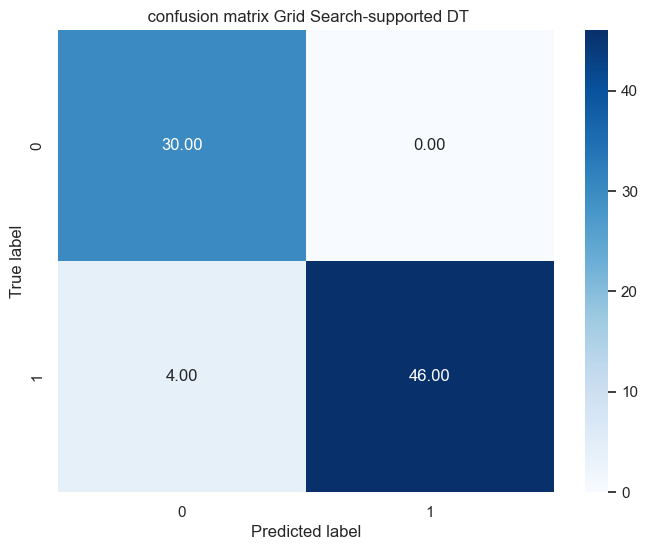

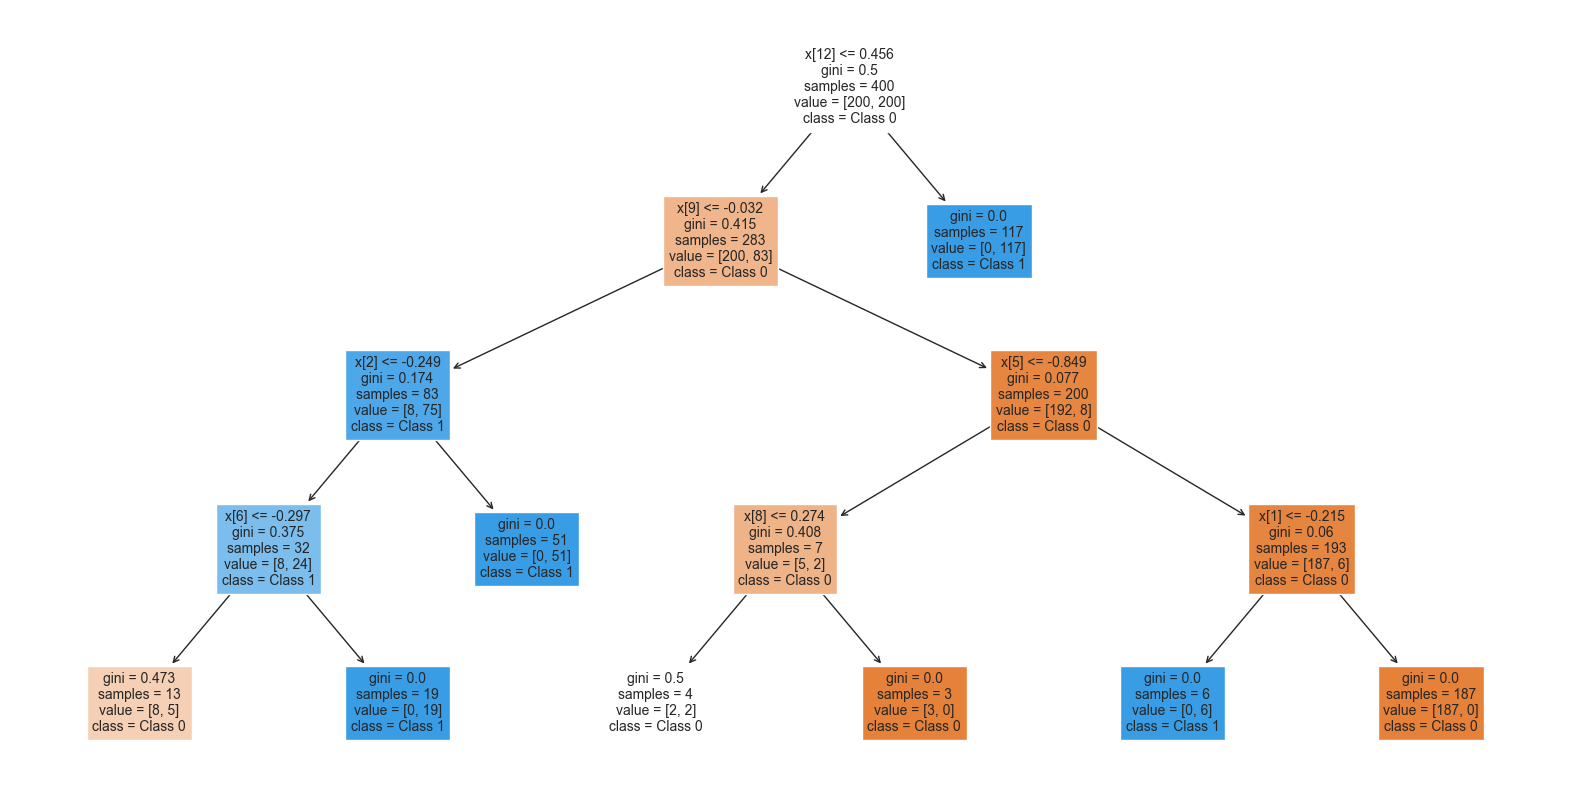

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


plot_confusion_matrix(y_test,y_pred_new,[0,1],title=" confusion matrix Grid Search-supported DT")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree_model, filled=True, class_names=['Class 0', 'Class 1'], fontsize=10)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Regularization penalty
}

# Define the number of folds for k-fold cross-validation
k = 5
# Create a KFold object
cv = KFold(n_splits=k, shuffle=True, random_state=0)

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
grid_search.fit(X_train_resampled, y_train_resampled)

c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']})

In [ ]:
best_estimator = grid_search.best_estimator_
lg_y_predicted = best_estimator.predict(X_test_scaled)

# Print training and testing accuracies
print(
    f"Training Accuracy of lg is {best_estimator.score(X_train_resampled, y_train_resampled)}")
print(
    f"Testing Accuracy of lg is {best_estimator.score(X_test, y_test)}")


# Print classification report
report = classification_report(y_test, lg_y_predicted)
print(report)

Training Accuracy of lg is 0.97
Testing Accuracy of lg is 0.9625
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        30
           1       1.00      0.86      0.92        50

    accuracy                           0.91        80
   macro avg       0.91      0.93      0.91        80
weighted avg       0.93      0.91      0.91        80



c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Confusion matrix, without normalization
[[30  0]
 [ 7 43]]


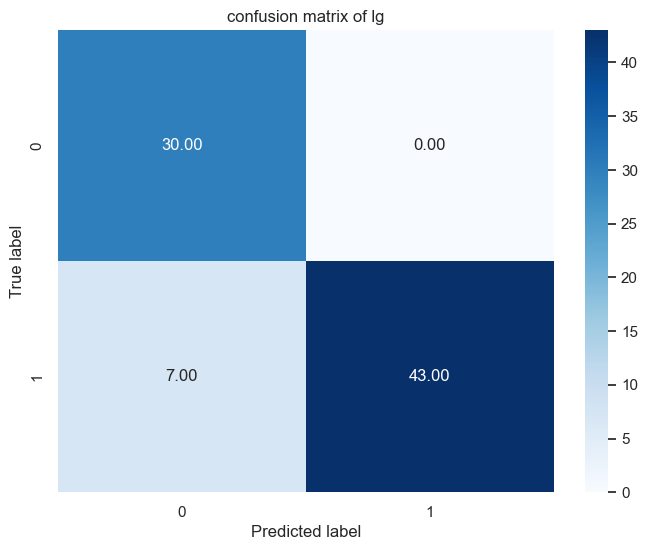

In [ ]:
plot_confusion_matrix(y_test, lg_y_predicted, classes=[
                      0, 1], title="confusion matrix of lg")

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True)

parameter = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10]
}

grid_search = GridSearchCV(svm, parameter)
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.01}
0.9775


In [ ]:
svm = SVC(gamma=0.01, C=10, probability=True)
svm.fit(X_train_resampled_scaled, y_train_resampled)

SVC(C=10, gamma=0.01, probability=True)

In [ ]:
svm_acc = accuracy_score(y_test, svm.predict(X_test_scaled))
print(
    f"Training Accuracy of SVC is {accuracy_score(y_train_resampled, svm.predict(X_train_resampled_scaled))}")
print(
    f"Testing Accuracy of SVC is {accuracy_score(y_test, svm.predict(X_test_scaled))}")


report = classification_report(y_test, svm.predict(X_test_scaled))
print(report)

Training Accuracy of SVC is 0.9875
Testing Accuracy of SVC is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Confusion matrix, without normalization
[[30  0]
 [ 0 50]]


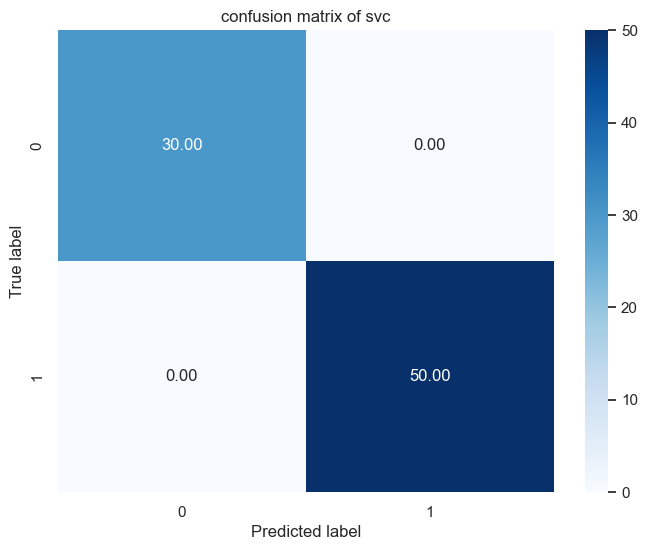

In [ ]:
plot_confusion_matrix(y_test, svm.predict(X_test_scaled), classes=[
                      0, 1], title="confusion matrix of svc")